<a href="https://colab.research.google.com/github/Eieiz007/Deep-learning/blob/main/RNN_Many_to_One.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
import pandas as pd

import tensorflow as tf

from tensorflow.keras.optimizers import Adam , AdamW
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , Normalizer

Create data

In [ ]:
num_days = 500
dates = pd.date_range(start="2020-01-01", periods=num_days, freq="D")
oil_prices = 50 + 5 * np.sin(np.linspace(0, 20, num_days)) + np.random.normal(0, 1, num_days)
temperature = 30 + 10 * np.sin(np.linspace(0, 10, num_days)) + np.random.normal(0, 1, num_days)

df = pd.DataFrame({"Date": dates, "Oil_Price": oil_prices, "Temperature": temperature})

df.head()

Date  Oil_Price  Temperature
0 2020-01-01  49.590613    30.833068
1 2020-01-02  49.705788    29.953748
2 2020-01-03  51.230852    29.924304
3 2020-01-04  50.646771    31.130562
4 2020-01-05  51.472634    30.708621

prepartation data

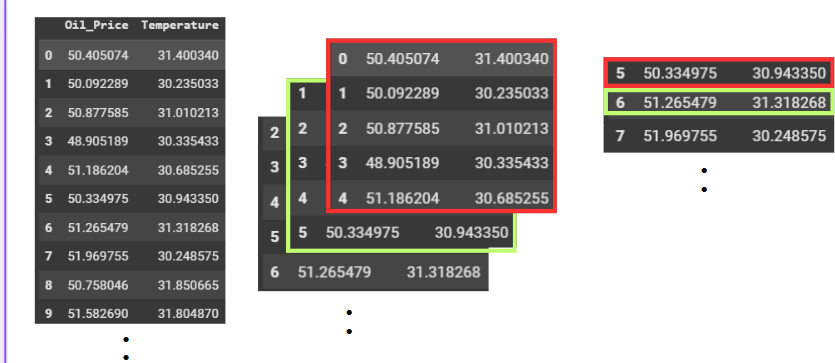

In [ ]:
time_step = 5 #‡πÉ‡∏ä‡πâ‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏Å‡πà‡∏≠‡∏ô‡∏´‡∏ô‡πâ‡∏≤ 5 ‡∏ó‡∏≥‡∏ô‡∏≤‡∏¢


In [ ]:
# iloc[row,column]
#len(row) - time_step = n_subsets
print(len(df))


# y = 6 , x = [1,2,3,4,5]
# y = 7 , x = [2,3,4,5,6]
# ..............
# y = 500 , x = [495,496,497,498,499] 495 subsets


500


In [ ]:
X, y = [], []

for i in range(len(df) - time_step):
    X.append(df.iloc[i:i+time_step, 1:].values)  # ‡πÉ‡∏ä‡πâ‡πÄ‡∏â‡∏û‡∏≤‡∏∞‡∏ü‡∏µ‡πÄ‡∏à‡∏≠‡∏£‡πå Oil_Price ‡πÅ‡∏•‡∏∞ Temperature
    # iloc[0:1+5] = [0 1 2 3 4]
    y.append(df.iloc[i+time_step, 1:].values)   # Target ‡∏Ñ‡∏∑‡∏≠‡∏Ñ‡πà‡∏≤‡∏Ç‡∏≠‡∏á‡∏ß‡∏±‡∏ô‡∏ñ‡∏±‡∏î‡πÑ‡∏õ
    # iloc[0+5] = [6]


In [ ]:
X[:2]

[array([[49.59061251, 30.83306757],
        [49.70578797, 29.95374843],
        [51.2308521 , 29.92430444],
        [50.64677089, 31.13056162],
        [51.47263443, 30.7086211 ]]),
 array([[49.70578797, 29.95374843],
        [51.2308521 , 29.92430444],
        [50.64677089, 31.13056162],
        [51.47263443, 30.7086211 ],
        [49.17495548, 31.32629142]])]

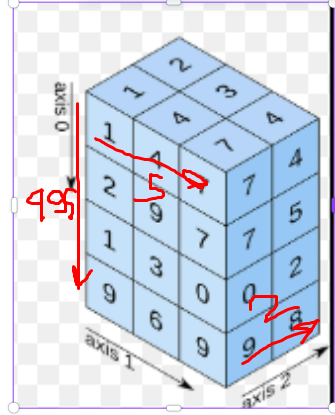

In [ ]:
# ‡πÅ‡∏õ‡∏•‡∏á‡πÄ‡∏õ‡πá‡∏ô numpy array
X = np.array(X)
y = np.array(y)

# ‡∏ï‡∏£‡∏ß‡∏à‡∏™‡∏≠‡∏ö shape
X.shape, y.shape

((495, 5, 2), (495, 2))

splitting data

In [ ]:
# ‡πÅ‡∏ö‡πà‡∏á‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏• Train (70%) ‡πÅ‡∏•‡∏∞ (Val+Test) (30%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, shuffle=False) #‡∏´‡πâ‡∏≤‡∏°‡∏™‡∏∏‡πà‡∏°‡πÄ‡∏û‡∏£‡∏≤‡∏∞‡πÄ‡∏õ‡πá‡∏ô time series
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, shuffle=False)

In [ ]:
X_train.reshape(-1, X_train.shape[-1]) #‡∏•‡∏î‡πÉ‡∏´‡πâ‡πÄ‡∏´‡∏•‡∏∑‡∏≠ 2D ‡πÄ‡∏û‡∏£‡∏≤‡∏∞ standardization must 2d

array([[49.59061251, 30.83306757],
       [49.70578797, 29.95374843],
       [51.2308521 , 29.92430444],
       ...,
       [55.04296386, 35.24702028],
       [55.90031998, 37.56670755],
       [52.67531245, 35.17601308]])

In [ ]:
#‡πÅ‡∏õ‡∏•‡∏á‡∏Å‡∏•‡∏±‡∏ö
X_train.reshape(-1, X_train.shape[-1]).reshape(X_train.shape)[:2] # == x_train ‡πÅ‡∏õ‡∏•‡∏á‡∏Å‡∏•‡∏±‡∏ö‡∏°‡∏≤ 3D ‡πÄ‡∏´‡∏°‡∏∑‡∏≠‡∏ô‡πÄ‡∏î‡∏¥‡∏°

array([[[49.59061251, 30.83306757],
        [49.70578797, 29.95374843],
        [51.2308521 , 29.92430444],
        [50.64677089, 31.13056162],
        [51.47263443, 30.7086211 ]],

       [[49.70578797, 29.95374843],
        [51.2308521 , 29.92430444],
        [50.64677089, 31.13056162],
        [51.47263443, 30.7086211 ],
        [49.17495548, 31.32629142]]])

In [ ]:

# ‡∏™‡∏£‡πâ‡∏≤‡∏á‡∏ï‡∏±‡∏ß‡πÅ‡∏õ‡∏£ StandardScaler
scaler_X = StandardScaler()
scaler_y = StandardScaler()

# Fit transform ‡∏Å‡∏±‡∏ö Training data ‡πÅ‡∏•‡∏∞ Transform ‡∏ä‡∏∏‡∏î‡∏≠‡∏∑‡πà‡∏ô ‡πÜ
X_train_scaled = scaler_X.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
X_val_scaled = scaler_X.transform(X_val.reshape(-1, X_val.shape[-1])).reshape(X_val.shape)
X_test_scaled = scaler_X.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)

y_train_scaled = scaler_y.fit_transform(y_train) #y ‡∏ï‡πâ‡∏≠‡∏á‡πÅ‡∏õ‡∏•‡∏á‡∏î‡πâ‡∏ß‡∏¢‡πÄ‡∏û‡∏£‡∏≤‡∏∞ ‡πÄ‡∏Å‡∏¥‡∏î‡∏à‡∏≤‡∏Å ‡∏ß‡∏±‡∏ô‡∏ñ‡∏±‡∏î‡πÑ‡∏õ‡∏Ç‡∏≠‡∏á time_step ‡∏ó‡∏µ‡∏ï‡∏±‡πâ‡∏á‡πÄ‡∏≠‡∏≤‡πÑ‡∏ß‡πâ ‡∏Ñ‡πà‡∏≤‡∏°‡∏±‡∏ô‡πÄ‡∏¢‡∏≠‡∏∞
y_val_scaled = scaler_y.transform(y_val)
y_test_scaled = scaler_y.transform(y_test)

# ‡∏ï‡∏£‡∏ß‡∏à‡∏™‡∏≠‡∏ö shape
print("Train shape:", X_train_scaled.shape, y_train_scaled.shape)
print("Validation shape:", X_val_scaled.shape, y_val_scaled.shape)
print("Test shape:", X_test_scaled.shape, y_test_scaled.shape)


Train shape: (346, 5, 2) (346, 2)
Validation shape: (74, 5, 2) (74, 2)
Test shape: (75, 5, 2) (75, 2)


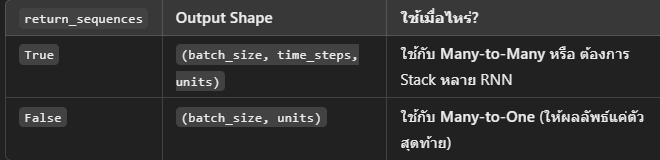

In [ ]:
"""
Many to one  = return_sequences=False
input_shape = (time_steps, features)

"""

# ‡∏™‡∏£‡πâ‡∏≤‡∏á‡πÇ‡∏°‡πÄ‡∏î‡∏• SimpleRNN (Many-to-One)
model = Sequential([
    SimpleRNN(128, activation='relu', return_sequences=False, input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])),
    Dense(64, activation='relu'), #FC
    Dense(32, activation='relu'), #FC
    Dense(2)  # Output 2 ‡∏Ñ‡πà‡∏≤ (Oil_Price, Temperature)
])

# ‡∏Ñ‡∏≠‡∏°‡πÑ‡∏û‡∏•‡πå‡πÇ‡∏°‡πÄ‡∏î‡∏•
model.compile(optimizer=AdamW(learning_rate=0.001), loss='mse')

# Train ‡πÇ‡∏°‡πÄ‡∏î‡∏•
history = model.fit(X_train_scaled, y_train_scaled,
                    validation_data=(X_val_scaled, y_val_scaled),
                    epochs=100, batch_size=64, verbose=1)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 76ms/step - loss: 0.8480 - val_loss: 0.2457
Epoch 2/100
6/6 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 19ms/step - loss: 0.2897 - val_loss: 0.1700
Epoch 3/100
6/6 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 20ms/step - loss: 0.1341 - val_loss: 0.0940
Epoch 4/100
6/6 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 26ms/step - loss: 0.0858 - val_loss: 0.1076
Epoch 5/100
6/6 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 19ms/step - loss: 0.0975 - val_loss: 0.0989
Epoch 6/100
6/6 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 18ms/step - loss: 0.0782 - val_loss: 0.0757
Epoch 7/100
6/6 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 22ms/step - loss: 0.0724 - val_loss: 0.0789
Epoch 8/100
6/6 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 19ms/step - loss: 0.0694 - val_loss: 0.0741
Epoch 9/100
6/6 ‚îÅ‚

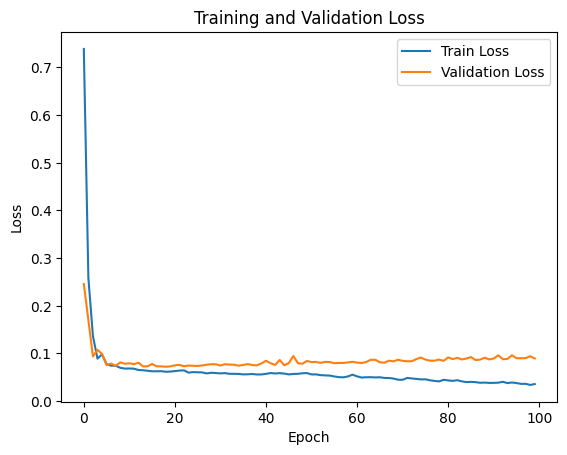

In [ ]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# ‡∏ó‡∏î‡∏™‡∏≠‡∏ö‡πÇ‡∏°‡πÄ‡∏î‡∏•‡∏Å‡∏±‡∏ö Test set
y_pred_scaled = model.predict(X_test_scaled)
y_pred_scaled[:5]

3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 12ms/step


array([[-1.54714   ,  1.0698397 ],
       [-1.5313522 ,  1.094751  ],
       [-1.6963713 ,  0.98185575],
       [-1.5370616 ,  1.0793527 ],
       [-1.3573186 ,  0.97821194]], dtype=float32)

In [ ]:
# ‡πÅ‡∏õ‡∏•‡∏á‡∏Ñ‡πà‡∏≤‡∏Å‡∏•‡∏±‡∏ö‡πÄ‡∏õ‡πá‡∏ô‡∏™‡πÄ‡∏Å‡∏•‡πÄ‡∏î‡∏¥‡∏°
y_pred = scaler_y.inverse_transform(y_pred_scaled) #Nomalization ‡πÑ‡∏°‡πà‡∏ï‡πâ‡∏≠‡∏á‡πÅ‡∏õ‡∏•‡∏á‡∏Å‡∏•‡∏±‡∏ö
y_test = scaler_y.inverse_transform(y_test_scaled)
y_pred[:5]

array([[44.92379 , 37.686375],
       [44.97976 , 37.857727],
       [44.394756, 37.081165],
       [44.95952 , 37.75181 ],
       [45.596718, 37.0561  ]], dtype=float32)

In [ ]:
df_result = pd.DataFrame({'Actual_Oil': y_test[:, 0], 'Predicted_Oil': y_pred[:, 0],
                          'Actual_Temp': y_test[:, 1], 'Predicted_Temp': y_pred[:, 1]})
df_result

Actual_Oil  Predicted_Oil  Actual_Temp  Predicted_Temp
0    44.412936      44.923790    37.822439       37.686375
1    45.787726      44.979759    37.737827       37.857727
2    43.977375      44.394756    38.364016       37.081165
3    45.096238      44.959518    37.282682       37.751808
4    45.904287      45.596718    36.810172       37.056099
..         ...            ...          ...             ...
70   55.658888      53.914394    25.341121       25.944187
71   53.374284      54.228191    25.788068       25.988783
72   55.141109      54.346359    25.468807       25.822786
73   54.285671      53.983459    25.994811       25.145151
74   54.517197      55.328243    25.679331       25.125212

[75 rows x 4 columns]

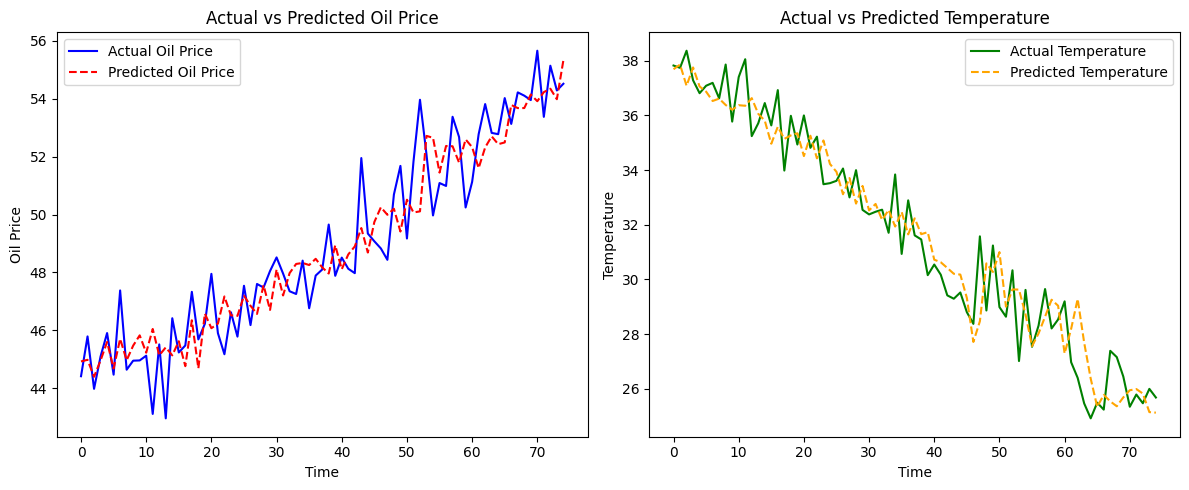

In [ ]:

# ‡∏ï‡∏±‡πâ‡∏á‡∏Ñ‡πà‡∏≤‡∏Ç‡∏ô‡∏≤‡∏î‡∏Ç‡∏≠‡∏á‡∏Å‡∏£‡∏≤‡∏ü
plt.figure(figsize=(12, 5))

# üîπ Plot ‡∏£‡∏≤‡∏Ñ‡∏≤‡∏ô‡πâ‡∏≥‡∏°‡∏±‡∏ô (Oil Price)
plt.subplot(1, 2, 1)  # 1 ‡πÅ‡∏ñ‡∏ß 2 ‡∏Ñ‡∏≠‡∏•‡∏±‡∏°‡∏ô‡πå ‡∏Å‡∏£‡∏≤‡∏ü‡πÅ‡∏£‡∏Å
plt.plot(df_result['Actual_Oil'], label='Actual Oil Price', color='blue')
plt.plot(df_result['Predicted_Oil'], label='Predicted Oil Price', color='red', linestyle='dashed')
plt.xlabel('Time')
plt.ylabel('Oil Price')
plt.title('Actual vs Predicted Oil Price')
plt.legend()

# üîπ Plot ‡∏≠‡∏∏‡∏ì‡∏´‡∏†‡∏π‡∏°‡∏¥ (Temperature)
plt.subplot(1, 2, 2)  # ‡∏Å‡∏£‡∏≤‡∏ü‡∏ó‡∏µ‡πà‡∏™‡∏≠‡∏á
plt.plot(df_result['Actual_Temp'], label='Actual Temperature', color='green')
plt.plot(df_result['Predicted_Temp'], label='Predicted Temperature', color='orange', linestyle='dashed')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.title('Actual vs Predicted Temperature')
plt.legend()

# ‡πÅ‡∏™‡∏î‡∏á‡∏Å‡∏£‡∏≤‡∏ü
plt.tight_layout()
plt.show()


In [ ]:
# üîπ ‡∏Ñ‡∏≥‡∏ô‡∏ß‡∏ì Mean Absolute Percentage Error (MAPE) ‡πÄ‡∏õ‡πá‡∏ô Accuracy
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
accuracy = 100 - mape  # ‡∏Ñ‡∏¥‡∏î‡πÄ‡∏õ‡πá‡∏ô % ‡∏Ñ‡∏ß‡∏≤‡∏°‡πÅ‡∏°‡πà‡∏ô‡∏¢‡∏≥

print(f"Test Accuracy: {accuracy:.2f}%")

Test Accuracy: 97.51%


In [ ]:
# ‡∏î‡∏∂‡∏á‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏•‡πà‡∏≤‡∏™‡∏∏‡∏î‡∏à‡∏≤‡∏Å Test Set
latest_input = X_test_scaled[-1:]  # ‡πÄ‡∏≠‡∏≤‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏™‡∏∏‡∏î‡∏ó‡πâ‡∏≤‡∏¢ (shape = (1, time_step, features))

# ‡∏ó‡∏≥‡∏ô‡∏≤‡∏¢‡∏ß‡∏±‡∏ô‡∏ñ‡∏±‡∏î‡πÑ‡∏õ
predicted_next_scaled = model.predict(latest_input)

# ‡πÅ‡∏õ‡∏•‡∏á‡∏Ñ‡πà‡∏≤‡∏Å‡∏•‡∏±‡∏ö‡πÄ‡∏õ‡πá‡∏ô‡∏™‡πÄ‡∏Å‡∏•‡πÄ‡∏î‡∏¥‡∏°
predicted_next = scaler_y.inverse_transform(predicted_next_scaled)

# ‡πÅ‡∏™‡∏î‡∏á‡∏ú‡∏•
print(f"‡∏û‡∏¢‡∏≤‡∏Å‡∏£‡∏ì‡πå‡∏ß‡∏±‡∏ô‡∏ñ‡∏±‡∏î‡πÑ‡∏õ:")
print(f"‡∏£‡∏≤‡∏Ñ‡∏≤‡∏ô‡πâ‡∏≥‡∏°‡∏±‡∏ô (Oil Price): {predicted_next[0,0]:.2f}")
print(f"‡∏≠‡∏∏‡∏ì‡∏´‡∏†‡∏π‡∏°‡∏¥ (Temperature): {predicted_next[0,1]:.2f}")

1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 40ms/step
‡∏û‡∏¢‡∏≤‡∏Å‡∏£‡∏ì‡πå‡∏ß‡∏±‡∏ô‡∏ñ‡∏±‡∏î‡πÑ‡∏õ:
‡∏£‡∏≤‡∏Ñ‡∏≤‡∏ô‡πâ‡∏≥‡∏°‡∏±‡∏ô (Oil Price): 55.33
‡∏≠‡∏∏‡∏ì‡∏´‡∏†‡∏π‡∏°‡∏¥ (Temperature): 25.13


‡∏Å‡∏≤‡∏£‡∏ó‡∏≥‡∏á‡∏≤‡∏ô



```
Initial Hidden State: h_0 (‡πÄ‡∏ß‡∏Å‡πÄ‡∏ï‡∏≠‡∏£‡πå‡∏Ç‡∏ô‡∏≤‡∏î 50)
                                        ‚Üì ‡πÉ‡∏ä‡πâ‡πÄ‡∏õ‡πá‡∏ô‡∏Ñ‡πà‡∏≤‡∏ï‡∏±‡πâ‡∏á‡∏ï‡πâ‡∏ô timestep 1
Timestep 1
Input [‡πÅ‡∏ñ‡∏ß‡∏ó‡∏µ‡πà 1 ‡∏Ç‡∏≠‡∏á subset 1]  ‚Üí Hidden State 50 node (h_1)  
                                       ‚Üì ‡∏™‡πà‡∏á‡∏Ñ‡πà‡∏≤‡∏ï‡πà‡∏≠‡πÑ‡∏õ timestep 2
Timestep 2
Input [‡πÅ‡∏ñ‡∏ß‡∏ó‡∏µ‡πà 2 ‡∏Ç‡∏≠‡∏á subset 1]  ‚Üí Hidden State 50 node (h_2)  
                                       ‚Üì ‡∏™‡πà‡∏á‡∏Ñ‡πà‡∏≤‡∏ï‡πà‡∏≠‡πÑ‡∏õ timestep 3
Timestep 3
Input [‡πÅ‡∏ñ‡∏ß‡∏ó‡∏µ‡πà 3 ‡∏Ç‡∏≠‡∏á subset 1]  ‚Üí Hidden State 50 node (h_3)  
                                       ‚Üì ‡∏™‡πà‡∏á‡∏Ñ‡πà‡∏≤‡∏ï‡πà‡∏≠‡πÑ‡∏õ timestep 4
Timestep 4
Input [‡πÅ‡∏ñ‡∏ß‡∏ó‡∏µ‡πà 4 ‡∏Ç‡∏≠‡∏á subset 1]  ‚Üí Hidden State 50 node (h_4)  
                                       ‚Üì ‡∏™‡πà‡∏á‡∏Ñ‡πà‡∏≤‡∏ï‡πà‡∏≠‡πÑ‡∏õ timestep 5
Timestep 5
Input [‡πÅ‡∏ñ‡∏ß‡∏ó‡∏µ‡πà 5 ‡∏Ç‡∏≠‡∏á subset 1]  ‚Üí Hidden State 50 node (h_5)  ‚Üí Fully Connected ‡∏ó‡∏≥‡∏ô‡∏≤‡∏¢‡πÅ‡∏ñ‡∏ß‡∏ó‡∏µ‡πà 6

```



‡πÄ‡∏õ‡πá‡∏ô 50 ‡∏ï‡∏±‡∏ß‡πÄ‡∏î‡∏¥‡∏° ‡πÅ‡∏•‡∏∞‡πÄ‡∏™‡πâ‡∏ô‡πÇ‡∏¢‡∏á‡∏à‡∏∞‡πÄ‡∏ä‡∏∑‡πà‡∏≠‡∏°‡∏Å‡∏±‡∏ô‡∏ó‡∏±‡πâ‡∏á‡∏´‡∏°‡∏î‡πÄ‡∏ä‡πà‡∏ô h_1_node_1 >                       h_2_node_1 h_2_node_2 h_2_node_3 h_2_node_.... h_2_node_50